# MUT Power Up players and their eligible teams (scraped from FootballDB)
#### - Matt , August 29, 2018<br>

- Made Fixes
- Added HOF players
- Added Aug 25 legends
- Added team captains

In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('csv/powerup_data_aug18.csv')
#data.set_value(5, 'Ind', 1) # - added Ted
#data.set_value(5, 'Bal', 0)
data.drop('Unnamed: 0', axis=1, inplace=True)
numeric_data = data.select_dtypes(include=['int64', 'float64']).drop('OVR', axis=1)
numeric_data.sum().sort_values(ascending=False)
teams = numeric_data.columns

In [133]:
def insert_player(name, pos, pos2, teams, data):
    data = data.append({'Name': name, 'POS':pos, 'POS2':pos2}, ignore_index=True).fillna(0)
    
    for team in teams:
        data.set_value(len(data)-1, team, 1)
        
    return data

In [134]:
#data = insert_player('Aeneas Williams', 'CB', 'DB', ['Ari', 'RAMS'], data)
#data = insert_player('Tony Gonzalez', 'TE', 'TE', ['KC', 'Atl'], data)

In [135]:
data.tail()

,Name,OVR,POS,PS4,firstName,lastName,POS2,Player,Pos,College,...,Phi,Pit,SF,Sea,TB,Ten,Was,RAMS,CHARGERS,numTeams
163,Jerry Rice,0.0,WR,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
164,Shannon Sharpe,0.0,TE,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
165,Michael Strahan,0.0,LE,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166,Aeneas Williams,0.0,CB,0,0,0,DB,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
167,Tony Gonzalez,0.0,TE,0,0,0,TE,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# Number of teams per power up player
data['numTeams'].value_counts().sort_values(ascending=False)

1.0    114
2.0     35
3.0     10
4.0      3
5.0      2
0.0      2
6.0      1
7.0      1
Name: numTeams, dtype: int64

In [137]:
a = numeric_data.sum().sort_values(ascending=False)[1:]

pal = {'Phi':'xkcd:green', 'NE': 'darkblue', 'NO':'gold', 'GB':'green',
       'Min':'xkcd:purple', 'Was':'maroon', 'Ten': 'cyan', 'TB':'xkcd:crimson',
       'Sea':'chartreuse', 'CHARGERS':'xkcd:azure', 'Atl':'xkcd:red',
       'Bal':'indigo', 'RAMS':'xkcd:khaki', 'KC':'red', 'NYJ': 'darkgreen',
       'Jax':'xkcd:darkgreen', 'Oak':'grey', 'Buf':'xkcd:blue', 'Car':'aqua',
       'Cle':'chocolate', 'Pit':'yellow', 'NYG':'blue', 'SF':'xkcd:gold',
       'Chi':'xkcd:orange', 'Dal':'xkcd:darkblue', 'Mia':'xkcd:aqua',
       'Den':'xkcd:orangered', 'Hou':'xkcd:navy', 'Ari':'xkcd:red',
       'Cin':'xkcd:orange', 'Det':'xkcd:lightblue', 'Ind':'xkcd:azure'}

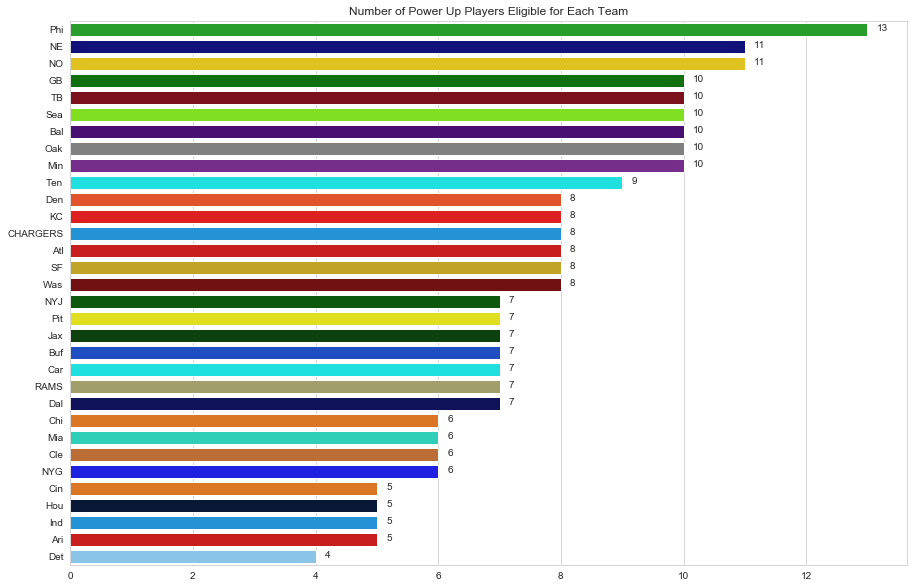

In [193]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=a.values, y=a.index, palette=pal)
for p in ax.patches:
    if np.isnan(p.get_width()):
        gh = 0.0
    else:
        gh = np.round(p.get_width(), 2)
                
    ax.annotate(int(gh), (np.round(gh+0.15, 3), p.get_y()+0.5))
ax.set_title('Number of Power Up Players Eligible for Each Team');

In [157]:
data.to_csv('powerup_aug18.csv')
small_data = data[['Name','POS','Teams', 'numTeams']]
small_data.to_csv('small_powerup_data.csv')

### Biggest journeymen

In [158]:
small_data['Teams'] = small_data['Teams'].str.replace(',', ', ')
small_data['Teams'] = small_data['Teams'].str.replace('NFLEHam', ' ')
small_data[ small_data['numTeams'] >= 4].sort_values('numTeams', ascending=False)

,Name,POS,Teams,numTeams
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
1,Randy Moss,WR,"Min, Oak, NE, Min, Ten, SF",6.0
110,Rashaan Melvin,CB,"TB, Bal, NE, Ind, Oak",5.0
157,Terrell Owens,WR,"SF, Phi, Dal, Buf, Cin",5.0
2,Michael Vick,QB,"Atl, Phi, NYJ, Pit",4.0
43,Demario Davis,MLB,"NYJ, Cle, NYJ, NO",4.0
159,Rod Woodson,CB,"Pit, SF, Bal, Oak",4.0


In [159]:
team_abbrevs = list(pal.keys())
team_list = []

data.reset_index(drop=True, inplace=True)
small_data.reset_index(drop=True, inplace=True)

for team in team_abbrevs:
    current_team = data[ data[team]==1]
    indices = current_team.index.values
    team_list.append(small_data.iloc[indices])

## Team Lists

![Image](http://content.sportslogos.net/logos/7/167/thumbs/960.gif)

In [160]:
i=0
team_list[i]

,Name,POS,Teams,numTeams
2,Michael Vick,QB,"Atl, Phi, NYJ, Pit",4.0
3,Reggie White,LE,"Phi, GB, Car",3.0
27,Nigel Bradham,LOLB,"Buf, Phi",2.0
41,Fletcher Cox,DT,Phi,1.0
51,Zach Ertz,TE,Phi,1.0
60,Brandon Graham,LE,Phi,1.0
71,Jordan Hicks,MLB,Phi,1.0
83,Malcolm Jenkins,SS,"NO, Phi",2.0
85,Lane Johnson,RT,0,1.0
95,Jason Kelce,C,Phi,1.0


![Image](http://content.sportslogos.net/logos/7/151/thumbs/y71myf8mlwlk8lbgagh3fd5e0.gif)

In [161]:
i+=1
print(team_abbrevs[i])
team_list[i]

NE


,Name,POS,Teams,numTeams
1,Randy Moss,WR,"Min, Oak, NE, Min, Ten, SF",6.0
16,David Andrews,C,NE,1.0
28,Tom Brady,QB,NE,1.0
32,Malcolm Butler,CB,"NE, Ten",2.0
45,James Develin,FB,", NE",1.0
49,Julian Edelman,WR,", NE",1.0
58,Stephon Gilmore,CB,"Buf, NE",2.0
65,Rob Gronkowski,TE,NE,1.0
108,Devin McCourty,FS,NE,1.0
110,Rashaan Melvin,CB,"TB, Bal, NE, Ind, Oak",5.0


![Image](http://content.sportslogos.net/logos/7/175/thumbs/907.gif)

In [162]:
i+=1
print(team_abbrevs[i])
team_list[i]

NO


,Name,POS,Teams,numTeams
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
8,Willie Roaf,LT,"NO, KC",2.0
29,Drew Brees,QB,"SD, NO",2.0
43,Demario Davis,MLB,"NYJ, Cle, NYJ, NO",4.0
61,Jimmy Graham,TE,"NO, Sea, GB",3.0
83,Malcolm Jenkins,SS,"NO, Phi",2.0
90,Cameron Jordan,LE,NO,1.0
94,Alvin Kamara,HB,NO,1.0
100,Marshon Lattimore,CB,NO,1.0
119,Ryan Ramczyk,RT,NO,1.0


![Image](http://content.sportslogos.net/logos/7/171/thumbs/dcy03myfhffbki5d7il3.gif)

In [163]:
i+=1
print(team_abbrevs[i])
team_list[i]

GB


,Name,POS,Teams,numTeams
3,Reggie White,LE,"Phi, GB, Car",3.0
5,Ted Hendricks,LOLB,"Bal, GB, Oak, LAR",3.0
12,Davante Adams,WR,GB,1.0
18,David Bakhtiari,LT,GB,1.0
37,Kenny Clark,DT,GB,1.0
61,Jimmy Graham,TE,"NO, Sea, GB",3.0
69,Casey Hayward,CB,"GB, SD, LAC",2.0
79,Micah Hyde,SS,"GB, Buf",2.0
123,Aaron Rodgers,QB,GB,1.0
130,Josh Sitton,LG,"GB, Chi, Mia",3.0


![Image](http://content.sportslogos.net/logos/7/172/thumbs/17227042013.gif)

In [164]:
i+=1
print(team_abbrevs[i])
team_list[i]

Min


,Name,POS,Teams,numTeams
6,Steve Hutchinson,LG,"Sea, Min, Ten",3.0
20,Anthony Barr,ROLB,Min,1.0
46,Stefon Diggs,WR,Min,1.0
63,Everson Griffen,RE,Min,1.0
91,Linval Joseph,DT,"NYG, Min",2.0
122,Xavier Rhodes,CB,Min,1.0
132,Harrison Smith,FS,Min,1.0
140,Adam Thielen,WR,Min,1.0


![Image](http://content.sportslogos.net/logos/7/168/thumbs/im5xz2q9bjbg44xep08bf5czq.gif)

In [165]:
i+=1
print(team_abbrevs[i])
team_list[i]

Was


,Name,POS,Teams,numTeams
0,Champ Bailey,CB,"Was, Den",2.0
9,Bruce Smith,RE,"Buf, Was",2.0
10,Sean Taylor,FS,Was,1.0
31,Zach Brown,MLB,0,3.0
97,Ryan Kerrigan,LOLB,Was,1.0
121,Jordan Reed,TE,Was,1.0
126,Brandon Scherff,RG,Was,1.0
151,Trent Williams,LT,0,1.0


![Image](http://content.sportslogos.net/logos/7/160/thumbs/1053.gif)

In [166]:
i+=1
print(team_abbrevs[i])
team_list[i]

Ten


,Name,POS,Teams,numTeams
1,Randy Moss,WR,"Min, Oak, NE, Min, Ten, SF",6.0
6,Steve Hutchinson,LG,"Sea, Min, Ten",3.0
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
31,Zach Brown,MLB,0,3.0
32,Malcolm Butler,CB,"NE, Ten",2.0
33,Kevin Byard,FS,Ten,1.0
35,Jurrell Casey,RE,Ten,1.0
102,Taylor Lewan,LT,Ten,1.0
147,Delanie Walker,TE,"SF, Ten",2.0


![Image](http://content.sportslogos.net/logos/7/176/thumbs/17636702014.gif)

In [167]:
i+=1
print(team_abbrevs[i])
team_list[i]

TB


,Name,POS,Teams,numTeams
4,Derrick Brooks,ROLB,TB,1.0
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
11,Steve Young,QB,"TB, SF",2.0
42,Lavonte David,ROLB,TB,1.0
48,Demar Dotson,RT,", TB",1.0
52,Mike Evans,WR,TB,1.0
64,Brent Grimes,CB,"Atl, Mia, TB,",3.0
109,Gerald McCoy,DT,TB,1.0
110,Rashaan Melvin,CB,"TB, Bal, NE, Ind, Oak",5.0
161,Tim Brown,WR,"Oak, TB",2.0


![Image](http://content.sportslogos.net/logos/7/180/thumbs/pfiobtreaq7j0pzvadktsc6jv.gif)

In [168]:
i+=1
print(team_abbrevs[i])
team_list[i]

Sea


,Name,POS,Teams,numTeams
6,Steve Hutchinson,LG,"Sea, Min, Ten",3.0
19,Doug Baldwin,WR,Sea,1.0
36,Kam Chancellor,SS,Sea,1.0
61,Jimmy Graham,TE,"NO, Sea, GB",3.0
128,Richard Sherman,CB,"Sea, SF",2.0
139,Golden Tate III,WR,0,2.0
142,Earl Thomas III,FS,0,1.0
146,Bobby Wagner,MLB,Sea,1.0
152,Russell Wilson,QB,Sea,1.0
163,Jerry Rice,WR,"SF, Oak, Sea",3.0


![Image](http://content.sportslogos.net/logos/7/6446/thumbs/644624152017.gif)

In [169]:
i+=1
print(team_abbrevs[i])
team_list[i]

CHARGERS


,Name,POS,Teams,numTeams
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
14,Keenan Allen,WR,"SD, LAC",1.0
25,Joey Bosa,LE,"SD, LAC",1.0
29,Drew Brees,QB,"SD, NO",2.0
59,Melvin Gordon,HB,"SD, LAC",1.0
69,Casey Hayward,CB,"GB, SD, LAC",2.0
70,Hunter Henry,TE,"SD, LAC",1.0
80,Melvin Ingram,RE,"SD, LAC",1.0


![Image](http://content.sportslogos.net/logos/7/173/thumbs/299.gif)

In [170]:
i+=1
print(team_abbrevs[i])
team_list[i]

Atl


,Name,POS,Teams,numTeams
2,Michael Vick,QB,"Atl, Phi, NYJ, Pit",4.0
56,Devonta Freeman,HB,Atl,1.0
64,Brent Grimes,CB,"Atl, Mia, TB,",3.0
87,Deion Jones,MLB,Atl,1.0
88,Julio Jones,WR,Atl,1.0
104,Alex Mack,C,"Cle, Atl",2.0
125,Matt Ryan,QB,Atl,1.0
145,Desmond Trufant,CB,Atl,1.0
167,Tony Gonzalez,TE,NaN,0.0


![Image](http://content.sportslogos.net/logos/7/153/thumbs/318.gif)

In [171]:
i+=1
print(team_abbrevs[i])
team_list[i]

Bal


,Name,POS,Teams,numTeams
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
93,Kyle Juszczyk,FB,"Bal, SF",2.0
110,Rashaan Melvin,CB,"TB, Bal, NE, Ind, Oak",5.0
115,Kelechi Osemele,LG,"Bal, Oak",2.0
133,Jimmy Smith,CB,0,1.0
137,Terrell Suggs,ROLB,Bal,1.0
153,Marshal Yanda,RG,Bal,1.0
159,Rod Woodson,CB,"Pit, SF, Bal, Oak",4.0
162,Ray Lewis,MLB,Bal,1.0
164,Shannon Sharpe,TE,"Den, Bal",2.0


![Image](http://content.sportslogos.net/logos/7/5941/thumbs/594179532017.gif)

In [172]:
i+=1
print(team_abbrevs[i])
team_list[i]

RAMS


,Name,POS,Teams,numTeams
47,Aaron Donald,RE,"Stl, LA",1.0
66,Todd Gurley II,HB,0,1.0
82,Janoris Jenkins,CB,"Stl, NYG",2.0
86,Trumaine Johnson,CB,0,2.0
92,Lamarcus Joyner,FS,"Stl, LA",1.0
117,Marcus Peters,CB,"KC, LA",2.0
138,Ndamukong Suh,DT,"Det, Mia, LA",3.0
166,Aeneas Williams,CB,NaN,0.0


![Image](http://content.sportslogos.net/logos/7/162/thumbs/857.gif)

In [173]:
i+=1
print(team_abbrevs[i])
team_list[i]

KC


,Name,POS,Teams,numTeams
8,Willie Roaf,LT,"NO, KC",2.0
23,Eric Berry,SS,KC,1.0
72,Tyreek Hill,WR,KC,1.0
75,Justin Houston,LOLB,KC,1.0
77,Rodney Hudson,C,"KC, Oak",2.0
78,Kareem Hunt,HB,KC,1.0
96,Travis Kelce,TE,KC,1.0
117,Marcus Peters,CB,"KC, LA",2.0
167,Tony Gonzalez,TE,NaN,0.0


![Image](http://content.sportslogos.net/logos/7/152/thumbs/v7tehkwthrwefgounvi7znf5k.gif)

In [174]:
i+=1
print(team_abbrevs[i])
team_list[i]

NYJ


,Name,POS,Teams,numTeams
2,Michael Vick,QB,"Atl, Phi, NYJ, Pit",4.0
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
13,Jamal Adams,SS,NYJ,1.0
68,Damon Harrison Sr,DT,0,2.0
86,Trumaine Johnson,CB,0,2.0


![Image](http://content.sportslogos.net/logos/7/159/thumbs/15988562013.gif)

In [175]:
i+=1
print(team_abbrevs[i])
team_list[i]

Jax


,Name,POS,Teams,numTeams
26,A.J. Bouye,CB,"Hou, Jax",2.0
34,Calais Campbell,LE,"Ari, Jax",2.0
54,Leonard Fournette,HB,Jax,1.0
81,Myles Jack,LOLB,Jax,1.0
113,Andrew Norwell,LG,"Car, Jax",2.0
120,Jalen Ramsey,CB,Jax,1.0
134,Telvin Smith,ROLB,0,1.0


![Image](http://content.sportslogos.net/logos/7/163/thumbs/g9mgk6x3ge26t44cccm9oq1vl.gif)

In [176]:
i+=1
print(team_abbrevs[i])
team_list[i]

Oak


,Name,POS,Teams,numTeams
1,Randy Moss,WR,"Min, Oak, NE, Min, Ten, SF",6.0
5,Ted Hendricks,LOLB,"Bal, GB, Oak, LAR",3.0
40,Amari Cooper,WR,Oak,1.0
77,Rodney Hudson,C,"KC, Oak",2.0
105,Khalil Mack,LE,Oak,1.0
110,Rashaan Melvin,CB,"TB, Bal, NE, Ind, Oak",5.0
115,Kelechi Osemele,LG,"Bal, Oak",2.0
159,Rod Woodson,CB,"Pit, SF, Bal, Oak",4.0
161,Tim Brown,WR,"Oak, TB",2.0
163,Jerry Rice,WR,"SF, Oak, Sea",3.0


![Image](http://content.sportslogos.net/logos/7/149/thumbs/n0fd1z6xmhigb0eej3323ebwq.gif)

In [177]:
i+=1
print(team_abbrevs[i])
team_list[i]

Buf


,Name,POS,Teams,numTeams
9,Bruce Smith,RE,"Buf, Was",2.0
27,Nigel Bradham,LOLB,"Buf, Phi",2.0
31,Zach Brown,MLB,0,3.0
58,Stephon Gilmore,CB,"Buf, NE",2.0
79,Micah Hyde,SS,"GB, Buf",2.0
116,Jason Peters,LT,"Buf, , Phi",2.0
157,Terrell Owens,WR,"SF, Phi, Dal, Buf, Cin",5.0


![Image](http://content.sportslogos.net/logos/7/174/thumbs/f1wggq2k8ql88fe33jzhw641u.gif)

In [178]:
i+=1
print(team_abbrevs[i])
team_list[i]

Car


,Name,POS,Teams,numTeams
3,Reggie White,LE,"Phi, GB, Car",3.0
98,Luke Kuechly,MLB,Car,1.0
112,Cam Newton,QB,Car,1.0
113,Andrew Norwell,LG,"Car, Jax",2.0
114,Greg Olsen,TE,"Chi, Car",2.0
129,Kawann Short,DT,Car,1.0
150,Daryl Williams,RT,Car,1.0


![Image](http://content.sportslogos.net/logos/7/155/thumbs/15578552015.gif)

In [179]:
i+=1
print(team_abbrevs[i])
team_list[i]

Cle


,Name,POS,Teams,numTeams
24,Joel Bitonio,LG,Cle,1.0
43,Demario Davis,MLB,"NYJ, Cle, NYJ, NO",4.0
99,Jarvis Landry,WR,"Mia, Cle",2.0
104,Alex Mack,C,"Cle, Atl",2.0
127,Jabaal Sheard,RE,"Cle, NE, Ind",3.0
154,Kevin Zeitler,RG,"Cin, Cle",2.0


![Image](http://content.sportslogos.net/logos/7/156/thumbs/970.gif)

In [180]:
i+=1
print(team_abbrevs[i])
team_list[i]

Pit


,Name,POS,Teams,numTeams
2,Michael Vick,QB,"Atl, Phi, NYJ, Pit",4.0
22,Le'Veon Bell,HB,Pit,1.0
30,Antonio Brown,WR,Pit,1.0
44,David DeCastro,RG,Pit,1.0
57,Marcus Gilbert,RT,Pit,1.0
124,Ben Roethlisberger,QB,Pit,1.0
159,Rod Woodson,CB,"Pit, SF, Bal, Oak",4.0


![Image](http://content.sportslogos.net/logos/7/166/thumbs/919.gif)

In [181]:
i+=1
print(team_abbrevs[i])
team_list[i]

NYG


,Name,POS,Teams,numTeams
21,Odell Beckham Jr,WR,0,1.0
39,Landon Collins,SS,NYG,1.0
68,Damon Harrison Sr,DT,0,2.0
82,Janoris Jenkins,CB,"Stl, NYG",2.0
91,Linval Joseph,DT,"NYG, Min",2.0
165,Michael Strahan,LE,NYG,1.0


![Image](http://content.sportslogos.net/logos/7/179/thumbs/17994552009.gif)

In [182]:
i+=1
print(team_abbrevs[i])
team_list[i]

SF


,Name,POS,Teams,numTeams
1,Randy Moss,WR,"Min, Oak, NE, Min, Ten, SF",6.0
11,Steve Young,QB,"TB, SF",2.0
93,Kyle Juszczyk,FB,"Bal, SF",2.0
128,Richard Sherman,CB,"Sea, SF",2.0
147,Delanie Walker,TE,"SF, Ten",2.0
157,Terrell Owens,WR,"SF, Phi, Dal, Buf, Cin",5.0
159,Rod Woodson,CB,"Pit, SF, Bal, Oak",4.0
163,Jerry Rice,WR,"SF, Oak, Sea",3.0


![Image](http://content.sportslogos.net/logos/7/169/thumbs/364.gif)

In [183]:
i+=1
print(team_abbrevs[i])
team_list[i]

Chi


,Name,POS,Teams,numTeams
15,Adrian Amos,SS,Chi,1.0
76,Jordan Howard,HB,Chi,1.0
114,Greg Olsen,TE,"Chi, Car",2.0
130,Josh Sitton,LG,"GB, Chi, Mia",3.0
144,Danny Trevathan,MLB,"Den, Chi",2.0
158,Brian Urlacher,MLB,Chi,1.0


![Image](http://content.sportslogos.net/logos/7/165/thumbs/406.gif)

In [184]:
i+=1
print(team_abbrevs[i])
team_list[i]

Dal


,Name,POS,Teams,numTeams
50,Ezekiel Elliott,HB,Dal,1.0
55,Travis Frederick,C,Dal,1.0
101,Sean Lee,ROLB,", Dal",1.0
106,Zack Martin,RG,Dal,1.0
135,Tyron Smith,LT,0,1.0
157,Terrell Owens,WR,"SF, Phi, Dal, Buf, Cin",5.0
160,Demarcus Ware,ROLB,"Dal, Den",2.0


![Image](http://content.sportslogos.net/logos/7/150/thumbs/15073062018.gif)

In [185]:
i+=1
print(team_abbrevs[i])
team_list[i]

Mia


,Name,POS,Teams,numTeams
64,Brent Grimes,CB,"Atl, Mia, TB,",3.0
89,Reshad Jones,SS,0,1.0
99,Jarvis Landry,WR,"Mia, Cle",2.0
130,Josh Sitton,LG,"GB, Chi, Mia",3.0
138,Ndamukong Suh,DT,"Det, Mia, LA",3.0
156,Dan Marino,QB,Mia,1.0


![Image](http://content.sportslogos.net/logos/7/161/thumbs/9ebzja2zfeigaziee8y605aqp.gif)

In [186]:
i+=1
print(team_abbrevs[i])
team_list[i]

Den


,Name,POS,Teams,numTeams
0,Champ Bailey,CB,"Was, Den",2.0
67,Chris Harris Jr,CB,0,1.0
111,Von Miller,LOLB,Den,1.0
141,Demaryius Thomas,WR,Den,1.0
144,Danny Trevathan,MLB,"Den, Chi",2.0
155,Terrell Davis,RB,Den,1.0
160,Demarcus Ware,ROLB,"Dal, Den",2.0
164,Shannon Sharpe,TE,"Den, Bal",2.0


![Image](http://content.sportslogos.net/logos/7/157/thumbs/570.gif)

In [187]:
i+=1
print(team_abbrevs[i])
team_list[i]

Hou


,Name,POS,Teams,numTeams
26,A.J. Bouye,CB,"Hou, Jax",2.0
38,Jadeveon Clowney,ROLB,Hou,1.0
74,DeAndre Hopkins,WR,Hou,1.0
107,Tyrann Mathieu,FS,"Ari, Hou",2.0
148,J.J. Watt,LE,Hou,1.0


![Image](http://content.sportslogos.net/logos/7/177/thumbs/kwth8f1cfa2sch5xhjjfaof90.gif)

In [188]:
i+=1
print(team_abbrevs[i])
team_list[i]

Ari


,Name,POS,Teams,numTeams
34,Calais Campbell,LE,"Ari, Jax",2.0
53,Larry Fitzgerald,WR,Ari,1.0
84,David Johnson,HB,Ari,1.0
107,Tyrann Mathieu,FS,"Ari, Hou",2.0
118,Patrick Peterson,CB,Ari,1.0
166,Aeneas Williams,CB,NaN,0.0


![Image](http://content.sportslogos.net/logos/7/154/thumbs/403.gif)

In [189]:
i+=1
print(team_abbrevs[i])
team_list[i]

Cin


,Name,POS,Teams,numTeams
7,Lorenzo Neal,FB,"NO, NYJ, TB, Ten, Cin, SD, Bal",7.0
17,Geno Atkins,DT,Cin,1.0
62,A.J. Green,WR,Cin,1.0
154,Kevin Zeitler,RG,"Cin, Cle",2.0
157,Terrell Owens,WR,"SF, Phi, Dal, Buf, Cin",5.0


![Image](http://content.sportslogos.net/logos/7/170/thumbs/17013982017.gif)

In [190]:
i+=1
print(team_abbrevs[i])
team_list[i]

Det


,Name,POS,Teams,numTeams
131,Darius Slay Jr,CB,0,1.0
136,Matthew Stafford,QB,Det,1.0
138,Ndamukong Suh,DT,"Det, Mia, LA",3.0
139,Golden Tate III,WR,0,2.0


![Image](http://content.sportslogos.net/logos/7/158/thumbs/593.gif)

In [191]:
i+=1
print(team_abbrevs[i])
team_list[i]

Ind


,Name,POS,Teams,numTeams
5,Ted Hendricks,LOLB,"Bal, GB, Oak, LAR",3.0
73,T.Y. Hilton,WR,Ind,1.0
103,Andrew Luck,QB,", Ind",1.0
110,Rashaan Melvin,CB,"TB, Bal, NE, Ind, Oak",5.0
127,Jabaal Sheard,RE,"Cle, NE, Ind",3.0
